In [105]:
# Import needed libraries
import csv
import datetime
import numpy as np
import matplotlib.pyplot as plt
import scipy.signal
from shapely.geometry import Point
from shapely.geometry.polygon import Polygon

In [112]:
# Functions

# Sorting data according to time at given point
def sort_data(data_read, type_of_locator):

  locator = np.array([data[1:] for data in data_read if data[0] == type_of_locator]).astype(float)
  locator_sorted = locator[np.argsort(locator[:,-1])]

  return locator_sorted


# Check if there are too large time deviations
def check_timestamp(locator_sorted):

  diff_time = np.diff(locator_sorted[:,2])
  norm = diff_time - np.mean(diff_time)
  plt.plot(norm)
  plt.title('Norm')
  plt.show()
  average = np.mean(norm)/np.mean(diff_time)

  print(np.mean(diff_time))
  print(average)


# Calculating and plotting velocity
def calculate_velocity(locator_sorted):

  diff = np.array((np.diff(locator_sorted[:,0]),np.diff(locator_sorted[:,1]))) # derivatives of x and y
  velocity = np.linalg.norm(diff,axis=0)
  plt.plot(velocity)
  plt.title('Velocity')
  plt.show()

  return velocity


# Speed thresholding to remove peaks and plotting it
def remove_peaks_velocity(thr,locator_sorted):

  velocity = calculate_velocity(locator_sorted)
  for idx,v in np.ndenumerate(velocity):
    if v > thr:
      velocity[idx[0]] = velocity[idx[0]-1]
      locator_sorted[idx[0],0] = locator_sorted[idx[0]-1,0]
      locator_sorted[idx[0],1] = locator_sorted[idx[0]-1,1]

  plt.plot(velocity)
  plt.title('Velocity without peaks')
  plt.show()

  return locator_sorted, velocity


# Filtering x and y cooridnates and calculating new velocity
def filtering(locator_sorted):

  x_filtered = np.convolve(locator_sorted[:,0], np.ones(20)/20, mode='valid')
  y_filtered = np.convolve(locator_sorted[:,1], np.ones(20)/20, mode='valid')

  diff = np.array((np.diff(x_filtered),np.diff(y_filtered)))
  velocity_filtered = np.linalg.norm(diff,axis=0)
  x_filtered = x_filtered[1:]
  y_filtered = y_filtered[1:]

  return x_filtered,y_filtered,velocity_filtered


# Calculating stop points according to given threshold of velocity
def calculate_stop_points(x, y, velocity, thr):
  stop_points = np.array([x[velocity < thr], y[velocity < thr]])
  return stop_points


# Check if given stop points are in the area
def is_in_area(area_1,area_2, stop_points):
  is_in_1 = [area_1.contains(Point(point[0],point[1])) for point in stop_points.T]
  is_in_2 = [area_2.contains(Point(point[0],point[1])) for point in stop_points.T]
  return is_in_1, is_in_2

In [106]:
# Load data
file_with_data = 'python_zadanie_dane.csv'

with open(file_with_data,'r') as data_file:
  data_read = np.array(list(csv.reader(data_file)))

In [113]:
# Sort data from given file according to timestamp and locator's number
locator_1 = sort_data(data_read,'locator_1')
locator_2 = sort_data(data_read,'locator_2')
locator_3 = sort_data(data_read,'locator_3')

Text(0.5, 1.0, 'timestamp locator_3')

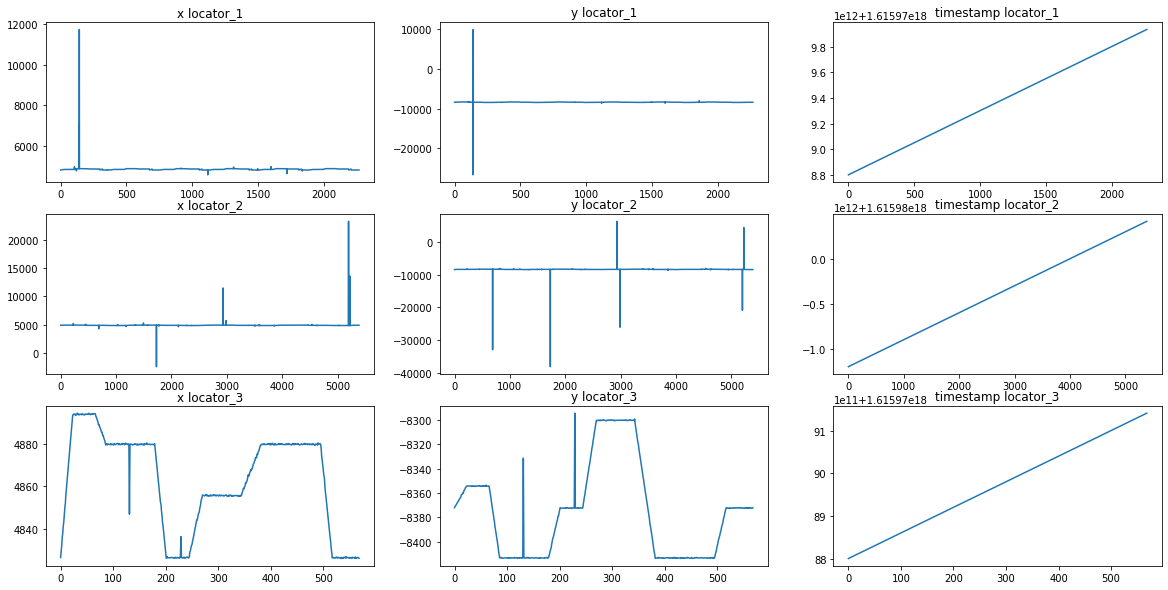

In [114]:
# Visualise data
fig, axs = plt.subplots(3,3)
fig.set_size_inches(20, 10)
axs[0][0].plot(locator_1[:,0])
axs[0][0].set_title('x locator_1')
axs[0][1].plot(locator_1[:,1])
axs[0][1].set_title('y locator_1')
axs[0][2].plot(locator_1[:,2])
axs[0][2].set_title('timestamp locator_1')

axs[1][0].plot(locator_2[:,0])
axs[1][0].set_title('x locator_2')
axs[1][1].plot(locator_2[:,1])
axs[1][1].set_title('y locator_2')
axs[1][2].plot(locator_2[:,2])
axs[1][2].set_title('timestamp locator_2')

axs[2][0].plot(locator_3[:,0])
axs[2][0].set_title('x locator_3')
axs[2][1].plot(locator_3[:,1])
axs[2][1].set_title('y locator_3')
axs[2][2].plot(locator_3[:,2])
axs[2][2].set_title('timestamp locator_3')

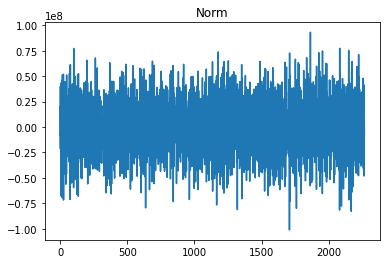

499974158.79311866
6.678589441295207e-18


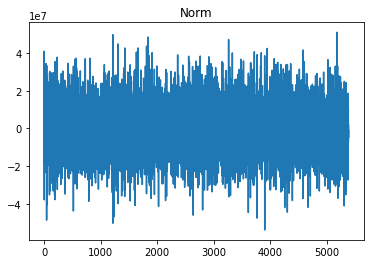

300004552.8271765
8.272457726724902e-17


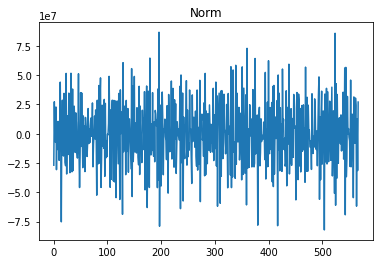

599937236.2816901
3.358359461572084e-17


In [115]:
# Check time deviations for every locator
# We do not if timestamp is consitent so we ensure that deviation of the timestamp is negligibly small and we can skip it in further computations
check_timestamp(locator_1)
check_timestamp(locator_2)
check_timestamp(locator_3)

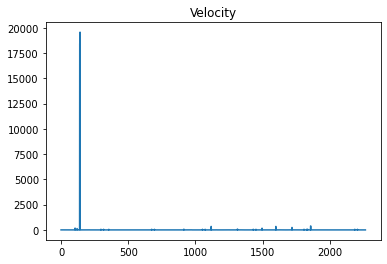

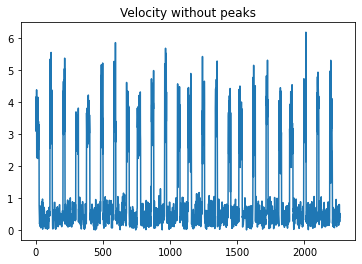

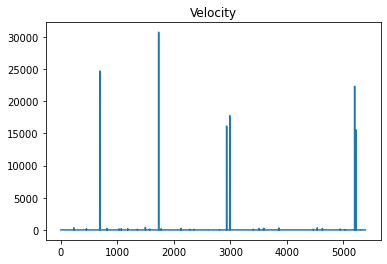

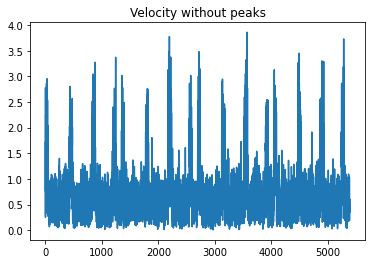

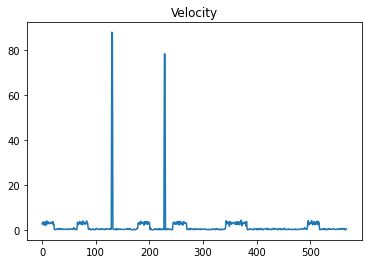

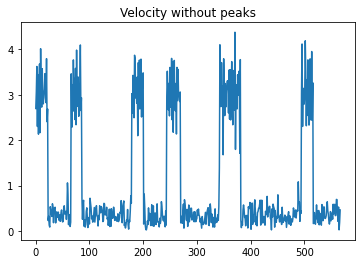

In [116]:
# Speed thresholding for every locator
locator_1, velocity_1 = remove_peaks_velocity(20, locator_1)
locator_2, velocity_2 = remove_peaks_velocity(20, locator_2)
locator_3, velocity_3 = remove_peaks_velocity(20, locator_3)

In [117]:
# Filtering data because technology for collecting location data is not perfect and it can be contaminated
x_filt_1, y_filt_1, velocity_1 = filtering(locator_1)
x_filt_2, y_filt_2, velocity_2 = filtering(locator_2)
x_filt_3, y_filt_3, velocity_3 = filtering(locator_3)

Text(0.5, 1.0, 'y locator_3')

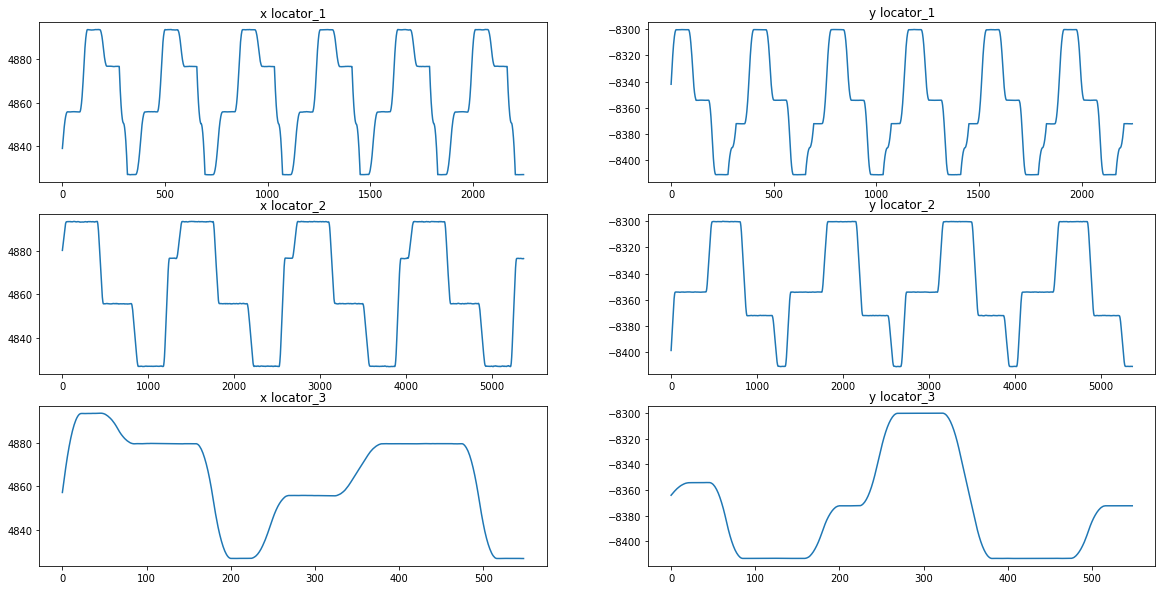

In [123]:
# Visualize x and y coordinates after filtering
fig, axs = plt.subplots(3,2)
fig.set_size_inches(20,10)
axs[0][0].plot(x_filt_1)
axs[0][0].set_title('x locator_1')
axs[0][1].plot(y_filt_1)
axs[0][1].set_title('y locator_1')

axs[1][0].plot(x_filt_2)
axs[1][0].set_title('x locator_2')
axs[1][1].plot(y_filt_2)
axs[1][1].set_title('y locator_2')

axs[2][0].plot(x_filt_3)
axs[2][0].set_title('x locator_3')
axs[2][1].plot(y_filt_3)
axs[2][1].set_title('y locator_3')

Text(0.5, 1.0, 'Velocity locator_3')

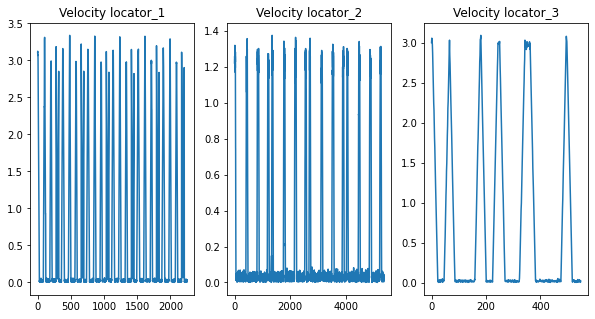

In [118]:
# Visualize velocity after filtering
fig, axs = plt.subplots(1,3)
fig.set_size_inches(10,5)
axs[0].plot(velocity_1)
axs[0].set_title('Velocity locator_1')
axs[1].plot(velocity_2)
axs[1].set_title('Velocity locator_2')
axs[2].plot(velocity_3)
axs[2].set_title('Velocity locator_3')

Text(0.5, 1.0, 'Locator_3')

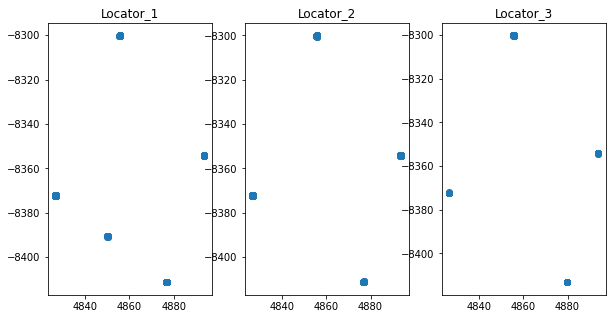

In [119]:
stop_1 = calculate_stop_points(x_filt_1,y_filt_1,velocity_1,0.2)
stop_2 = calculate_stop_points(x_filt_2,y_filt_2,velocity_2,0.2)
stop_3 = calculate_stop_points(x_filt_3,y_filt_3,velocity_3,0.2)

# Visualize
fig, axs = plt.subplots(1,3)
fig.set_size_inches(10,5)
axs[0].scatter(stop_1[0,:],stop_1[1,:])
axs[0].set_title('Locator_1')
axs[1].scatter(stop_2[0,:],stop_2[1,:])
axs[1].set_title('Locator_2')
axs[2].scatter(stop_3[0,:],stop_3[1,:])
axs[2].set_title('Locator_3')

In [120]:
# Check if stop points are in the area
area_a = Polygon([(4852.72,-8303.23),(4858.72,-8303.23),(4858.72,-8297.23),(4852.72,-8297.23)])
area_b = Polygon([(4873.72,-8409.23),(4881.72,-8409.23),(4881.72,-8412.73),(4869.72,-8412.73)])

is_1_in_a, is_1_in_b =  is_in_area(area_a,area_b,stop_1)
is_2_in_a, is_2_in_b =  is_in_area(area_a,area_b,stop_2)
is_3_in_a, is_3_in_b =  is_in_area(area_a,area_b,stop_3)

In [ ]:
# Next steps will be checking the time spent in every area using data stored in is_1_in_a, locator_1 etc. 
# Then we will check if given areas are fullfilling their given role. We have to check percentage of stops belongs to every area and according to that data define if they are fulfilling given role
# We have to find time between stopping and starting of every locator, provided that the point belongs to the zone
# To find number of passing between every stop point we have to use data stored in stop_1, locator_1 and velocity_1 etc. to check at what time point does not move and what time is starts moving.
# The set containing the rest of stopping points will be the set of locators moving between stop points. If we define at what time the object was in which area we will be able to determine which set of points  
# determinates the passage between zones